#  Predicting rock properties using regression
Dongfang Qu, University of Copenhagen

## 1 Data preparation

### 1.1 Understand and visualize the data

In [6]:
import pandas as pd
df = pd.read_csv('Data.csv')
df.head(n=5)

,depth,porosity,Vp,Gamma
0,41.93,44.06,2335.40,2.260
1,43.10,45.67,2224.62,3.373
2,43.98,45.01,2177.48,3.240
3,45.95,43.66,2173.71,2.269
4,46.26,44.38,2056.67,1.808


In [7]:
#check correlation between features
df[['porosity', 'Vp', 'Gamma']].corr()


,porosity,Vp,Gamma
porosity,1.000000,-0.639404,-0.614891
Vp,-0.639404,1.000000,0.340779
Gamma,-0.614891,0.340779,1.000000


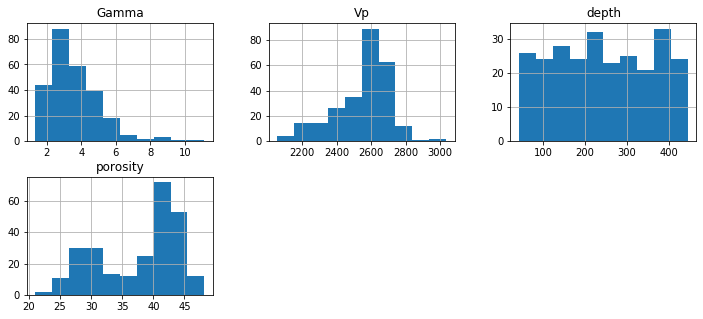

In [8]:
#histogram
import matplotlib.pyplot as plt
df.hist(figsize = (12,5),layout= (2,3))
plt.show()

In [9]:
y = df[['porosity']]
X = df[['Vp','Gamma']]
type(X)

pandas.core.frame.DataFrame

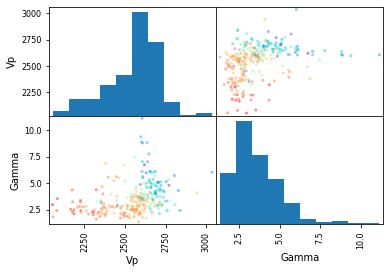

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(X,c = y['porosity'],cmap= 'rainbow')
plt.show()

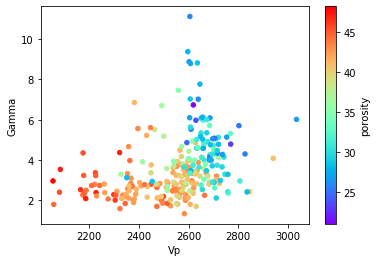

In [11]:
ax = plt.gca() #get currect axis
df.plot(kind='scatter',x='Vp',y='Gamma',c = 'porosity',cmap= 'rainbow',ax=ax)
plt.show()

### 1.2 Preprocessing data

If we want to use the preprocessing in the ‘supervised learning’, then it is better to ‘split’ the dataset as ‘test and train’ first; and then apply the preprocessing to the ‘training data’ only. This is the good practice as in real-life problems we will not have the future data for preprocessing.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [23]:
import numpy as np
print(np.mean(X_train))
print(np.var(X_train))

Vp       2553.564279
Gamma       3.583380
dtype: float64
Vp       25392.630208
Gamma        2.088846
dtype: float64


In [24]:
#StandardScaler sets the ‘mean = 0’ and ‘variance = 1’ for all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
type(X_train_std)# note that X_train_std is not panda dataframe anymore

numpy.ndarray

## 2 Training and validation

### Algorithm 1: linear regression

In [26]:
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

scores = cross_val_score(lin_reg, X_train_std, y_train,scoring='r2',cv=ShuffleSplit(n_splits=5, test_size=0.3, random_state=0))
print(scores)
print('mean',scores.mean())


[0.58370879 0.63140129 0.54008322 0.58602253 0.6416319 ]
mean 0.5965695468963966


### Algorithm 2: SVM kernel regression


In [27]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

C_list = [20,10,5,3,2,1,1e2]
for value in C_list:
    svr_rbf = SVR(kernel='rbf', C=value, gamma = 'auto')
   
    cross_score = cross_val_score(svr_rbf, X_train_std, y_train.values.ravel(), scoring = 'r2', cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))
    print('cross_score:',cross_score)
    print('cross_score_mean',cross_score.mean())
 

cross_score: [0.58369015 0.65540152 0.54574107 0.60188894 0.77113597]
cross_score_mean 0.6315715292605996
cross_score: [0.62185759 0.66402002 0.56064663 0.56729367 0.76409437]
cross_score_mean 0.635582456072397
cross_score: [0.6466907  0.67626673 0.55915339 0.53798944 0.75982279]
cross_score_mean 0.6359846107780459
cross_score: [0.66146742 0.66628008 0.55848144 0.56282883 0.76266412]
cross_score_mean 0.6423443765695243
cross_score: [0.66970653 0.6730254  0.55330869 0.56882314 0.7473479 ]
cross_score_mean 0.6424423323560668
cross_score: [0.63864735 0.64552072 0.51276735 0.52014188 0.6517218 ]
cross_score_mean 0.5937598225617421
cross_score: [0.51444001 0.64434503 0.50090151 0.61045305 0.78694748]
cross_score_mean 0.6114174158872816


In [16]:
#y_train_pred2 = SVR(kernel='rbf', C=3, gamma = 'auto').fit(X_train_std, y_train.values.ravel()).predict(X_train_std)
#r2_score(y_train, y_train_pred2)

0.8294016843314771

### Algorithm 3: KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
for n in [3,5,7,9,11]:
    regressor = KNeighborsRegressor(n_neighbors=n)
   
    cross_score = cross_val_score(regressor, X_train_std, y_train, scoring = 'r2', \
                                  cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))
    print('cross_score:',cross_score)
    print('cross_score_mean',cross_score.mean())

cross_score: [0.53948102 0.5988308  0.33115984 0.43487881 0.55816628]
cross_score_mean 0.4925033503509719
cross_score: [0.62937965 0.64334826 0.37712162 0.48179945 0.6590649 ]
cross_score_mean 0.5581427765147131
cross_score: [0.65690008 0.65669798 0.43942571 0.54449851 0.71095538]
cross_score_mean 0.6016955301178867
cross_score: [0.6974821  0.6987588  0.47166883 0.53561341 0.69455474]
cross_score_mean 0.6196155761150031
cross_score: [0.67217566 0.69223472 0.52088193 0.54327497 0.67926393]
cross_score_mean 0.6215662407343925


### Algorithm 4: DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

cross_score = cross_val_score(tree, X_train_std, y_train, scoring = 'r2', \
                              cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))
print('cross_score:',cross_score)
print('cross_score_mean',cross_score.mean())

cross_score: [ 0.20924212  0.37735331 -0.04066283  0.32136391  0.41201739]
cross_score_mean 0.25586278091234


### Algorithm 5: RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

cross_score = cross_val_score(regr, X_train_std, y_train.values.ravel(), scoring = 'r2', \
                              cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))
print('cross_score:',cross_score)
print('cross_score_mean',cross_score.mean())

cross_score: [0.44195858 0.48748514 0.1609359  0.44141518 0.65151244]
cross_score_mean 0.43666144638300375

### Model selection
Model selection should be based on the performance of the models on the validation dataset which are not involved in training.

The model that performs best on the validation dataset (i.e. with the highest cross validation score) is the SVM kernel regression model with hyperparameter C = 2.

## 3 Performance evaluation

Now test the performance of the selected model (SVM kerne regression, c=2) on the test dataset.

In [32]:
from sklearn.metrics import r2_score
y_test_pred = SVR(kernel='rbf', C=2, gamma = 'auto').fit(X_train_std, y_train.values.ravel()).predict(X_test_std)
r2_score(y_test, y_test_pred) 

0.6052433107955563